# CODE FOR THE CHAOTIC PENDULUM

In [1]:
import numpy as np #Main library for computation
import matplotlib.pyplot as plt #To create plots
import scipy as sp #Just in case 
plt.rcParams["figure.dpi"]=200 #Size of the plots 

# Phase Portrait Code for the Simple Pendulum

Here, the solve function was created for a general case and used to create a phase portrait

In [2]:
def solve(gamma,F_0=0,ANGLE=10,color='darkgoldenrod',label=None,return_plot=True):#initial parameters the code takes
    
    g = 9.81 #gravitation 
    l = 1   #length      
    omega_d=5 #Driving frequency

    def f(r, t): #vectorising the code
        theta = r[0]
        omega = r[1]
        dxdt = omega # to convert one second order ODE to 2 first order ODEs
        dvdt = - (g / l)*np.sin(theta)-gamma*dxdt+F_0*np.cos(omega_d*t) #equation of motion (unmodified)

        return np.array([dxdt, dvdt], dtype=float)


    a = 0.0 #initial time for integration
    b = 100.0 #final time for integration
    h = 0.1 #step length 

    time = np.arange(a, b, h) #array for time 
    theta = [] #empty list for appending solutions of ODE
    omega = [] #empty list for appending solutions for angular velocity 

    theta_0 = (np.pi / 180) * ANGLE #converting degrees to radians, initial displacement
    omega_0 = 0.0 #Initial velocity 
    r = np.array([theta_0, omega_0], dtype=float) #Rk4 integrator 
    for t in time:
        theta.append(r[0])
        omega.append(r[1])
        k1 = h * f(r, t) 
        k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
        k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
        k4 = h * f(r + k3, t + h)
        r  += (k1 + 2 * k2 + 2 * k3 + k4) / 6

    if (return_plot): #additional functionality

        
        plt.scatter(theta[0],omega[0],color=color,alpha=0.5)
        if (label==None):
            label=r'$\gamma=$'+str(gamma)
        plt.plot(theta, omega, color=color, lw=0.8,label=label)
        plt.xlabel('Angular displacement')
        plt.ylabel('Angular velocity')

        
    return (np.array(theta),np.array(omega)) #Returns a phase diagram for the given conditions


# Verifying RK4

For the case when the pendulum is not damped and not driven, the energy should stay constant. If this were true, then it would indicate that the integrator works well with minimal truncation errors

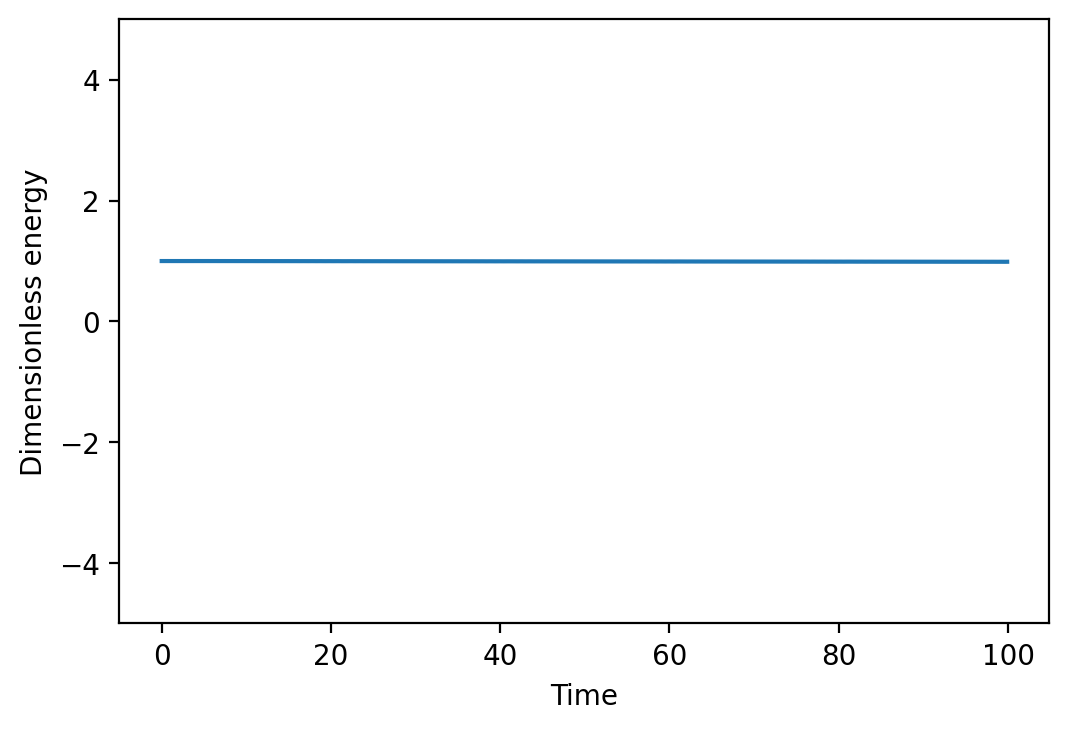

In [3]:
time=np.arange(0,100,0.1) #array for time
l=1 #length
g=9.8 #gravity
theta,omega=solve(gamma=0,return_plot=False) #obtaining two arrays for angle and velocity
energy=0.5*l**2*omega**2+g*l*(1-np.cos(theta)) #calculating total energy
E_dimensionless=energy/energy[0] #non dimensionalising the energy by initial value
fig, ax = plt.subplots() 
ax.plot(time,E_dimensionless)
ax.ticklabel_format(useOffset=False)
plt.ylabel('Dimensionless energy')
plt.xlabel('Time')
plt.ylim(-5,5)
plt.show()

The above diagram shows that energy is conserved and hence the RK4 integrator works. Now we can look at phase diagrams. 

# Phase portraits: 

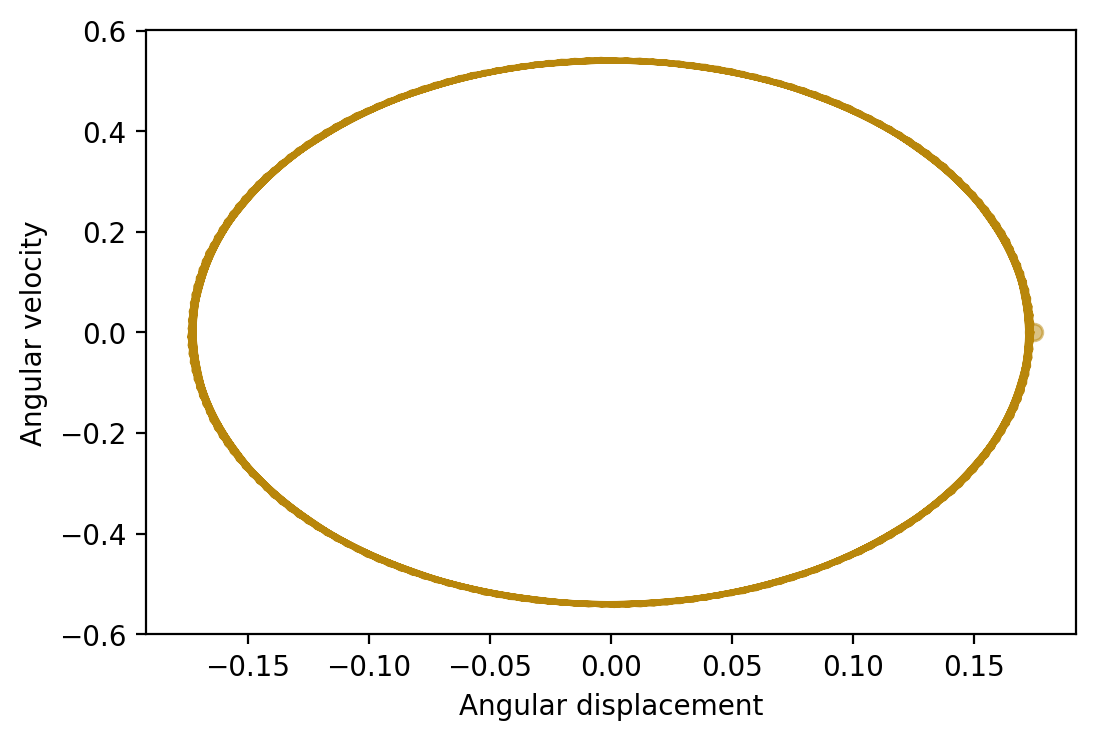

In [4]:
solve(0,0) #Phase portrait for undamped and undriven case (see linear center)
plt.show()

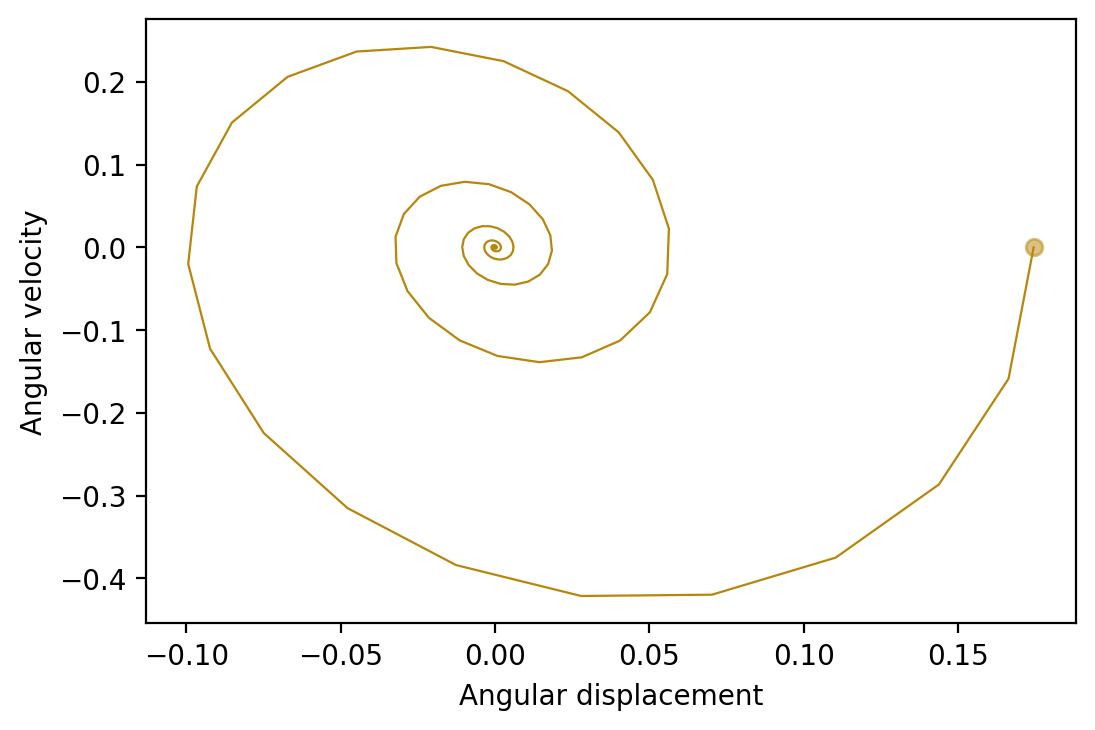

In [5]:
solve(1.1,0) #Phase portrait for damped but not driven (see stable spiral)
plt.show()

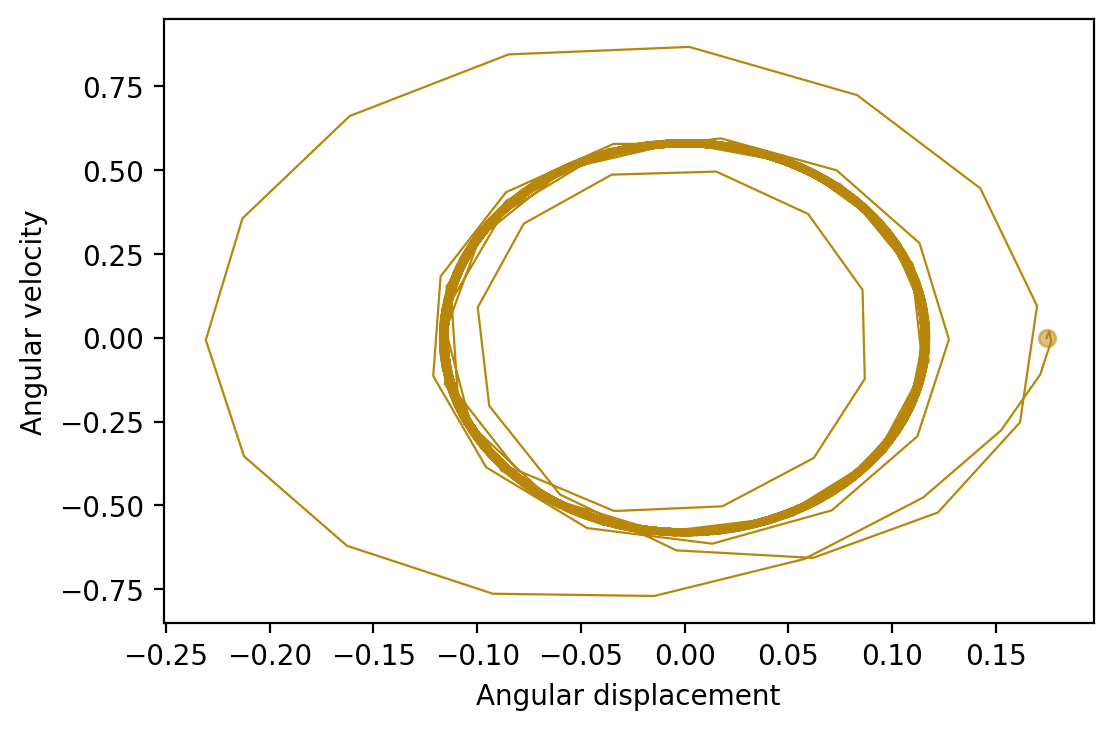

In [6]:
solve(1.5,2) #Phase portrait for damped driven (see limit cycle)
#To see global mixing or chaos, tune the driving force parameter accordingly
plt.show()

(0.0, 10.0)

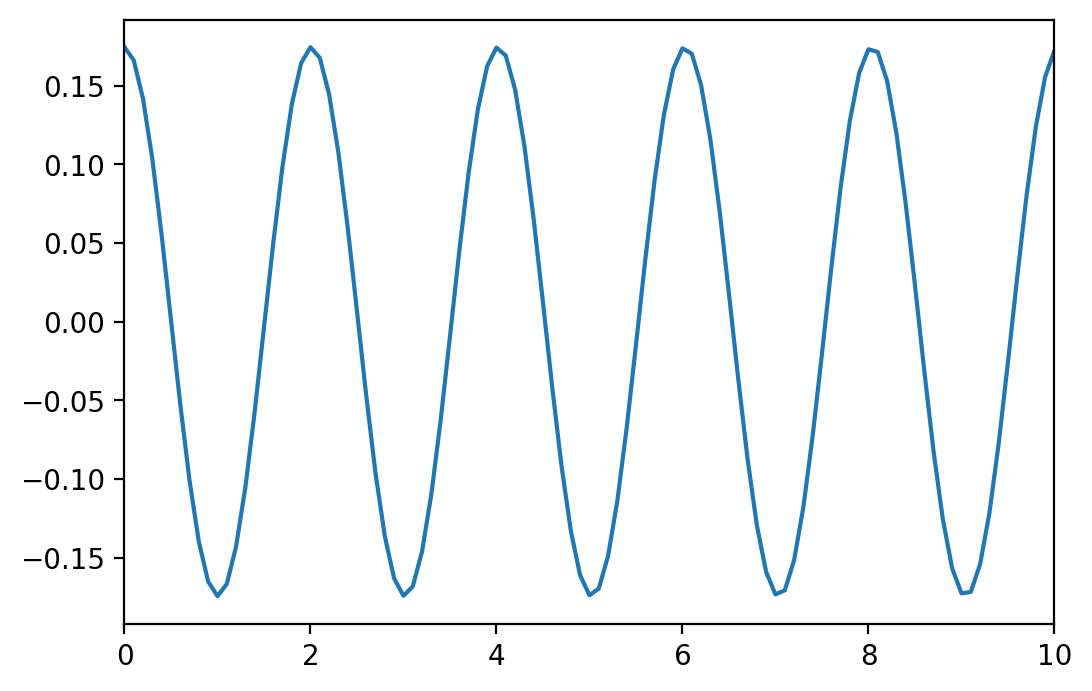

In [7]:
position,_=solve(0,0,return_plot=False) #obtaining position values from solve
plt.plot(time,position) #for displacement time graph 
plt.xlim(0,10)
plt.xlabel('time/s')
plt.ylabel('Angular displacement')

Text(0, 0.5, 'Angular displacement')

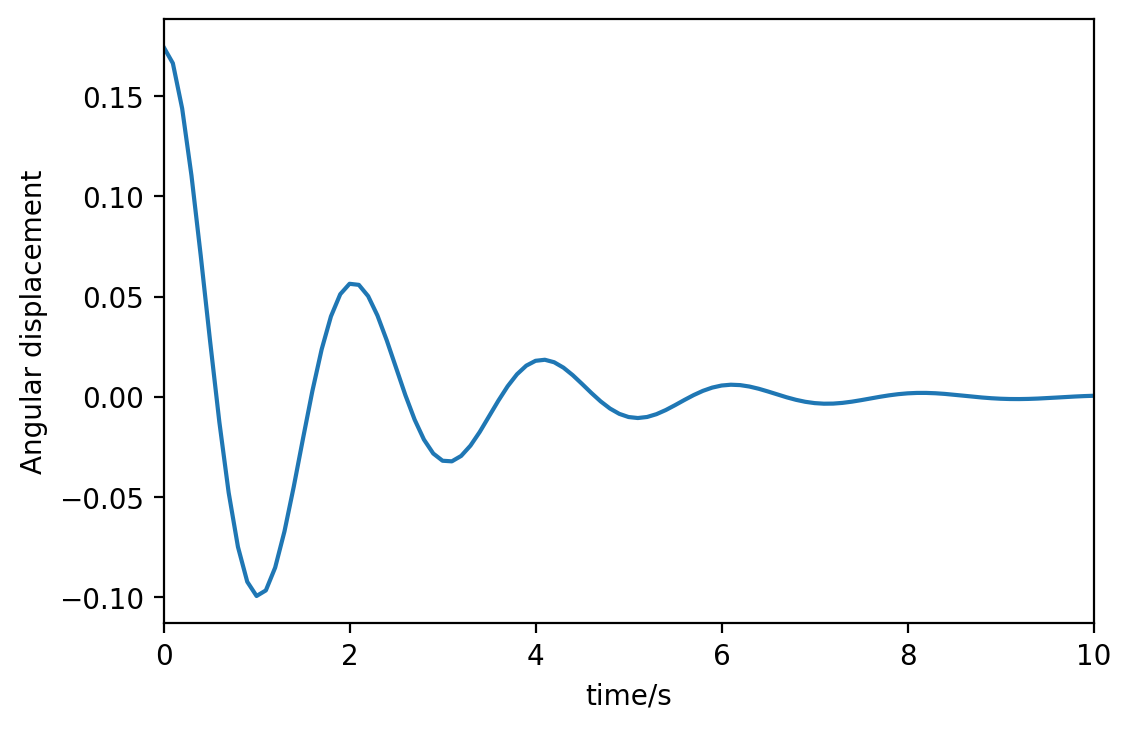

In [8]:
#displacement time graph for damped oscillator
position,_=solve(1.1,0,return_plot=False) 
plt.plot(time,position)
plt.xlim(0,10)
plt.xlabel('time/s')
plt.ylabel('Angular displacement')

Text(0, 0.5, 'Angular displacement')

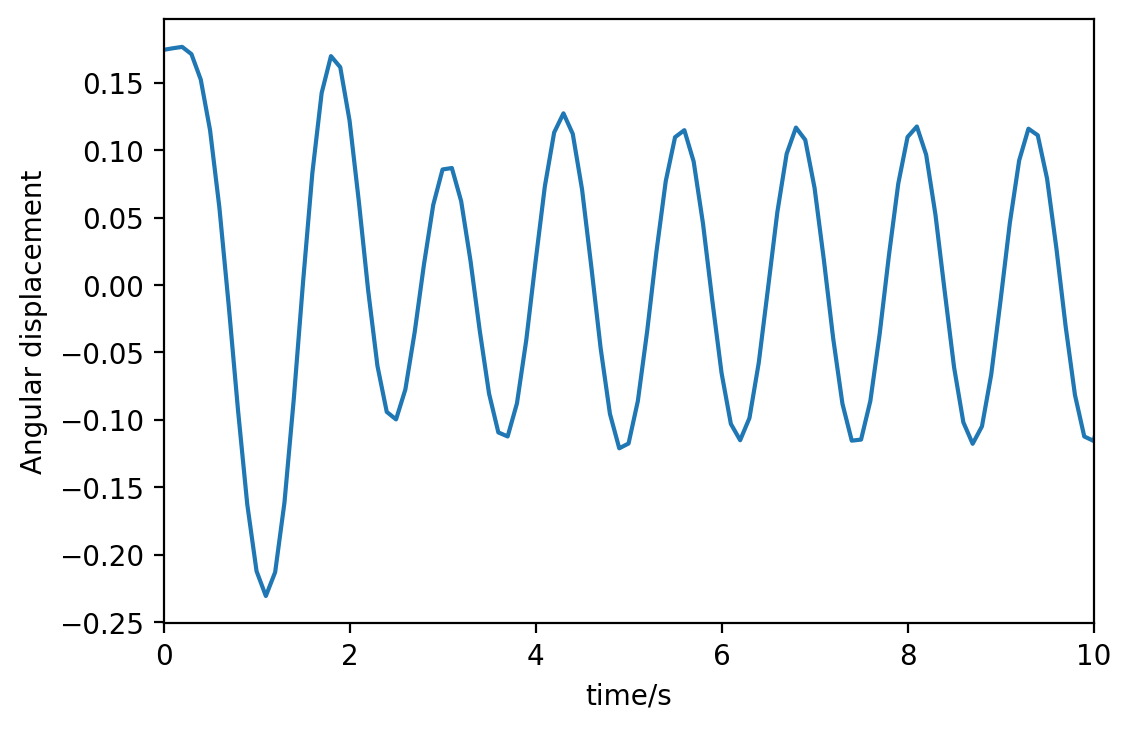

In [9]:
#displacement time for damped driven oscillator reaching  a steady state.
position,_=solve(1.5,2,return_plot=False)
plt.plot(time,position)
plt.xlim(0,10)
plt.xlabel('time/s')
plt.ylabel('Angular displacement')

# Non Linear Modification to the equation to study chaos:

In [82]:
#The ode was changed to include the damping factor beta and driving amplitude gamma according to the paper
def solve(gamma=1.05,x_0=0,color='darkgoldenrod',label=None,return_plot=True): 
    
    w_0=3*np.pi #this was the natural frequency 
    beta=w_0/8 #this was the damping coefficient
    omega_d=2*np.pi #driving frequency to simplify the poincare sections (see later)

    def f(r, t):
        theta = r[0]
        omega = r[1]
        dxdt = omega
        dvdt = - w_0**2*np.sin(theta)-2*beta*dxdt+gamma*w_0**2*np.cos(omega_d*t)

        return np.array([dxdt, dvdt], dtype=float)


    a=0
    b=1000 #use 10^5 for sufficient data points in graph
    h=0.01
    time = np.arange(a, b, h)
    theta = []
    omega = []

    theta_0 = x_0
    omega_0 = 0.0
    r = np.array([theta_0, omega_0], dtype=float) #rk4 integrator
    for t in time:
        theta.append(r[0])
        omega.append(r[1])
        k1 = h * f(r, t)
        k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
        k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
        k4 = h * f(r + k3, t + h)
        r  += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        
    return (np.array(theta),np.array(omega))

In [83]:
a=0
b=10000
h=0.1
time = np.arange(a, b, h)

#Gamma=0.7 for studying lyapunov behaviour when it is chaotic
X,_=solve(0.7,0,return_plot=False) #theta  for initial value (where theta_0=0)
Y,_=solve(0.7,0.001,return_plot=False) #theta-2 for initial value (where theta_0=0.001)
X_0=X[0] #theta-0 The initial value of the parameter
Y_0=Y[0] #theta-20 The initial value of the parameter
C_0=abs(X_0-Y_0) #Initial seperation vector 
Z=np.array(np.log((abs(X-Y)/C_0))) 
#Calculating the absolute log value of seperation vector scaled by initial values

#Gamma=0.4 for studying lyapunov behaviour when it is non chaotic
X1,_=solve(0.4,0,return_plot=False) #theta
Y1,_=solve(0.4,0.001,return_plot=False) #theta-2
X_01=X1[0] #theta-0
Y_01=Y1[0] #theta-20
C_01=abs(X_01-Y_01)
Z1=np.array(np.log((abs(X1-Y1)/C_01)))

#Gamma=1.22 for studying lyapunov behaviour when it is non chaotic
X2,_=solve(1.22,0,return_plot=False) #theta
Y2,_=solve(1.22,0.001,return_plot=False) #theta-2
X_02=X2[0] #theta-0
Y_02=Y2[0] #theta-20
C_02=abs(X_02-Y_02)
Z2=np.array(np.log((abs(X2-Y2)/C_02)))

C:\Users\HP\AppData\Local\Temp/ipykernel_6656/3341240796.py:15: RuntimeWarning: divide by zero encountered in log
  Z1=np.array(np.log((abs(X1-Y1)/C_01)))
C:\Users\HP\AppData\Local\Temp/ipykernel_6656/3341240796.py:29: RuntimeWarning: divide by zero encountered in log
  Z2=np.array(np.log((abs(X2-Y2)/C_02)))


## Required plots for Lyapunov exponent

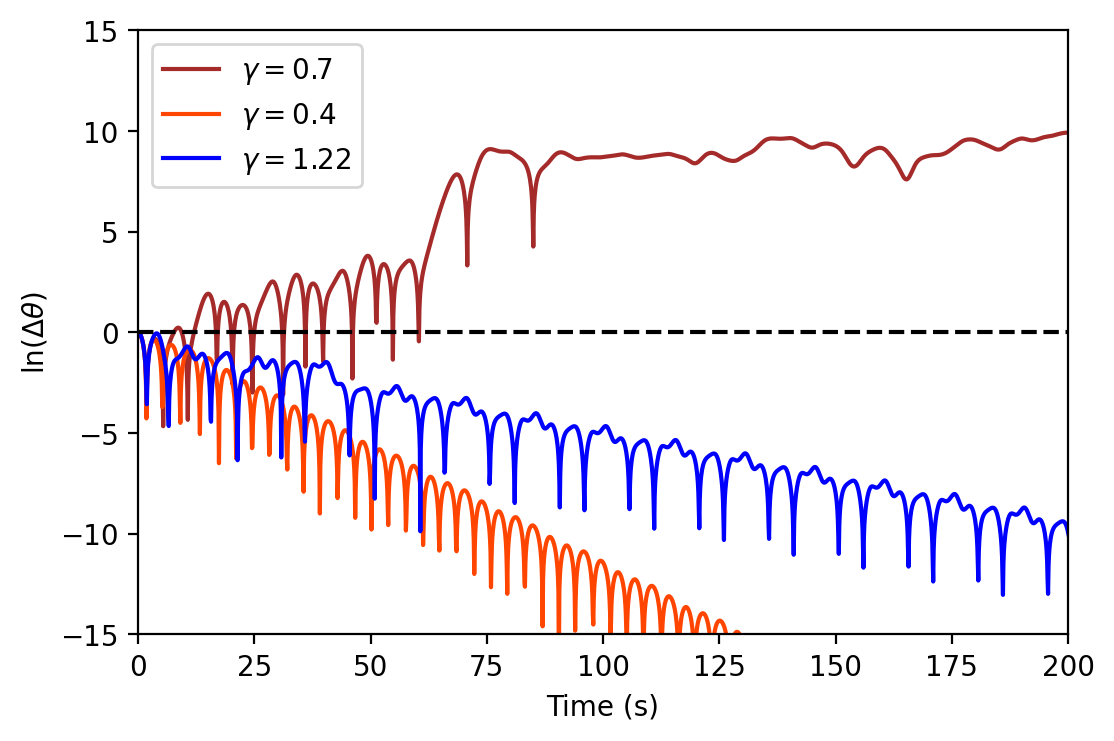

In [33]:
plt.plot(time, Z, label='$\gamma = 0.7$', c='brown')
plt.plot(time, Z1, label='$\gamma = 0.4$', c='orangered')
plt.plot(time, Z2, label='$\gamma = 1.22$', c='blue')
plt.xlabel('Time (s)')
plt.ylabel('ln($\Delta$$\\theta$)')
plt.legend()
plt.xlim(0,200)
plt.axhline(0,color='k',linestyle='--')
plt.ylim(-15,15)
#put that x=0 line plis
plt.show()

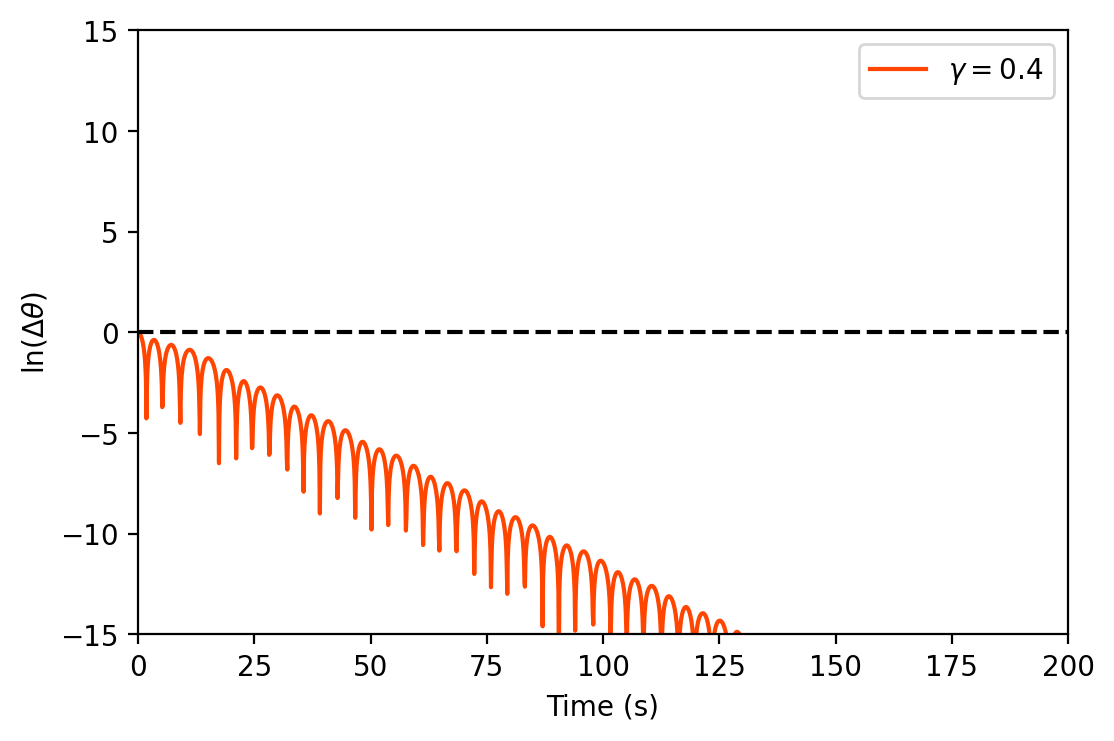

In [39]:
plt.plot(time, Z1, label='$\gamma = 0.4$', c='orangered')
plt.xlabel('Time (s)')
plt.ylabel('ln($\Delta$$\\theta$)')
plt.legend()
plt.xlim(0,200)
plt.axhline(0,color='k',linestyle='--')
plt.ylim(-15,15)
#put that x=0 line plis
plt.show()

In [64]:
lamda = [] #empty array to store lyapunov exponent
for i in range(len(Z1)):
    lamda.append(Z1[i]/time[i]) #value of lyapunov exponent for gamma=0.4

C:\Users\HP\AppData\Local\Temp/ipykernel_6656/3731619160.py:4: RuntimeWarning: invalid value encountered in double_scalars
  lamda.append(Z1[i]/time[i])


## Plotting Lyapunov exponent versus time: 

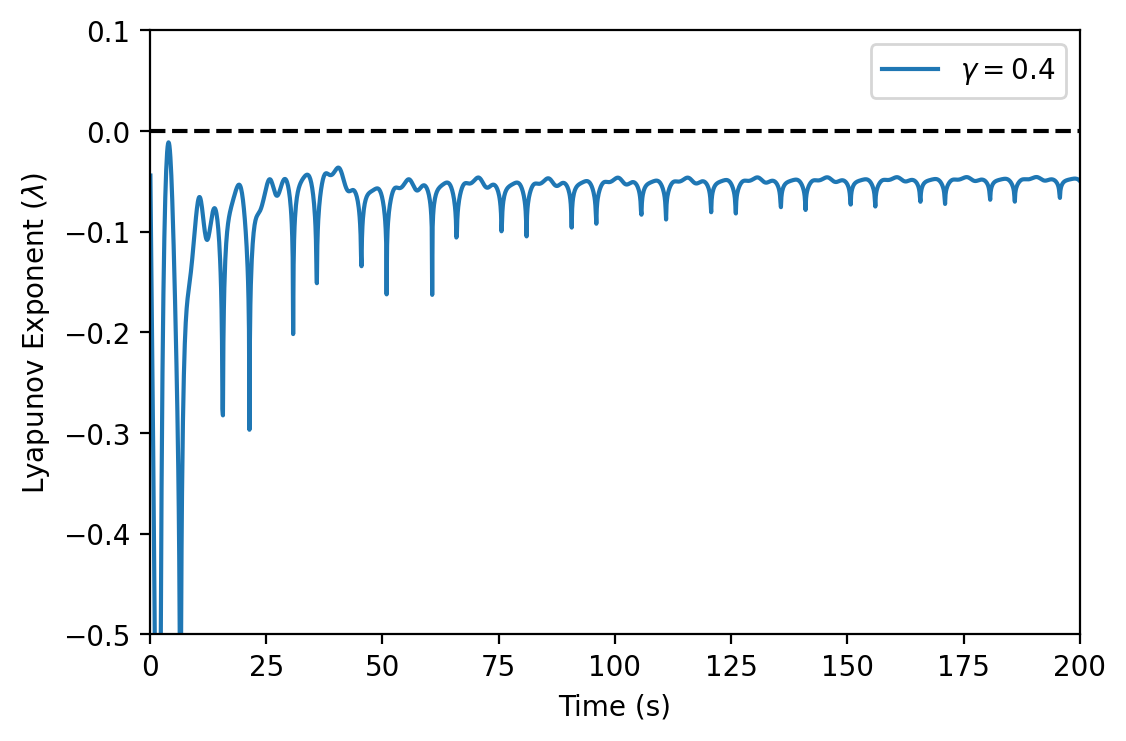

In [80]:
plt.plot(time, lamda, label='$\gamma = 0.4$') #Shows non Chaotic Behaviour
plt.xlim(0,200)
plt.ylim(-0.5,0.1)
plt.xlabel('Time (s)')
plt.ylabel('Lyapunov Exponent ($\lambda$)')
plt.legend()
plt.axhline(0,color='k',linestyle='--')

In [75]:
lamda2 = [] #Same as above for gamma=0.7

for i in range(len(Z)):
    lamda2.append(Z[i]/time[i])

C:\Users\HP\AppData\Local\Temp/ipykernel_6656/3290217158.py:4: RuntimeWarning: invalid value encountered in double_scalars
  lamda2.append(Z[i]/time[i])


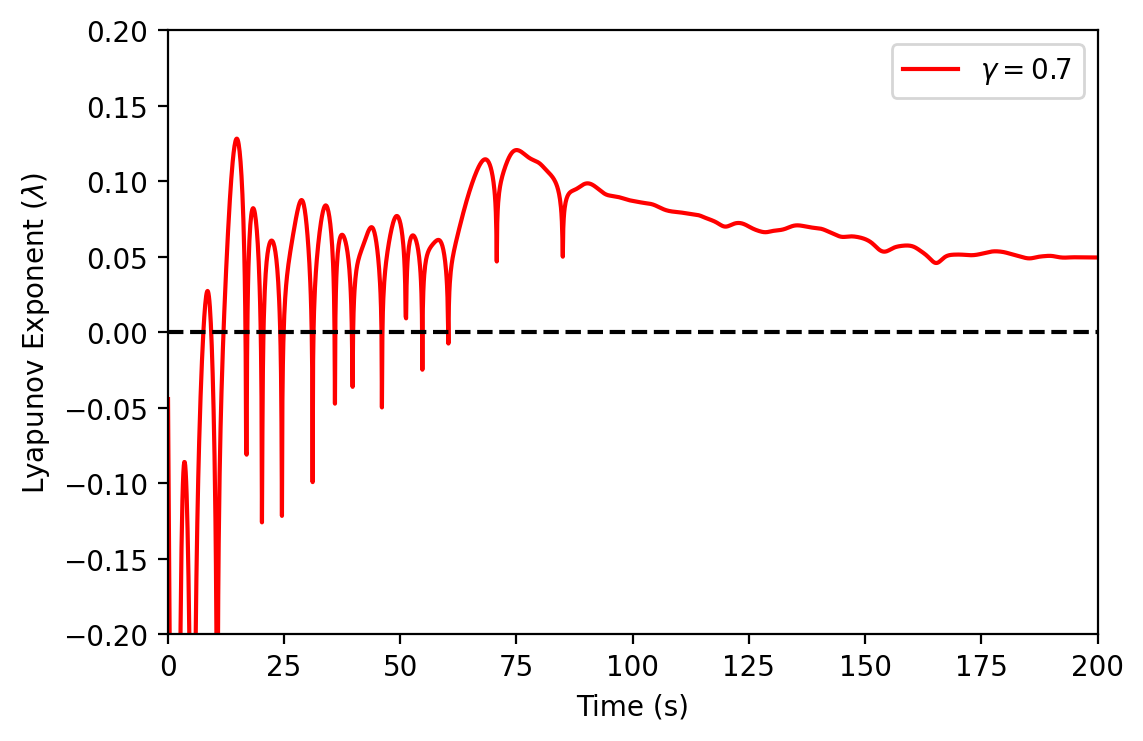

In [84]:
plt.plot(time, lamda2, label='$\gamma = 0.7 $', color='red') 
#Shows chaos as exponent value reaches positive quadrant
plt.xlim(0,200)
plt.ylim(-0.2,0.2)
plt.xlabel('Time (s)')
plt.ylabel('Lyapunov Exponent ($\lambda$)')
plt.axhline(0,color='k',linestyle='--')
plt.legend()

# Bifurcation diagrams

In [2]:
 #Taken from science blog (check citation) to convert the domain of the angle from -inf,inf to -pi,pi
def truncated_remainder(dividend, divisor):
    divided_number = dividend / divisor
    divided_number = \
        -int(-divided_number) if divided_number < 0 else int(divided_number)

    remainder = dividend - divisor * divided_number

    return remainder

In [3]:
#Taken from science blog (check citation) to convert the domain of the angle from -inf,inf to -pi,pi
def transform_to_pipi(input_angle):
    revolutions = int((input_angle + np.sign(input_angle) * np.pi) / (2 * np.pi))

    p1 = truncated_remainder(input_angle + np.sign(input_angle) * np.pi, 2 *np.pi)
    p2 = (np.sign(np.sign(input_angle)
                  + 2 * (np.sign(np.fabs((truncated_remainder(input_angle + np.pi, 2 * np.pi))
                                      / (2 *np.pi))) - 1))) *np.pi

    output_angle = p1 - p2

    return output_angle

In [4]:
def solve(gamma=1.05,color='darkgoldenrod',label=None,return_plot=True): #redefining solve for bifurcations
    
    w_0=3*np.pi 
    beta=w_0/8
    omega_d=2*np.pi

    def f(r, t):
        theta = r[0]
        omega = r[1]
        dxdt = omega
        dvdt = - w_0**2*np.sin(theta)-2*beta*dxdt+gamma*w_0**2*np.cos(omega_d*t)

        return np.array([dxdt, dvdt], dtype=float)


    a=0
    b=5000 #keep in a suitable range to reduce computational time 
    h=0.1 #0.01 takes a significant ammount of time. 
    time = np.arange(a, b, h)
    theta = []
    omega = []

    theta_0 = 0
    omega_0 = 0.0
    r = np.array([theta_0, omega_0], dtype=float)
    for t in time:
        theta.append(transform_to_pipi(r[0]))
        omega.append(r[1])
        k1 = h * f(r, t)
        k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
        k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
        k4 = h * f(r + k3, t + h)
        r  += (k1 + 2 * k2 + 2 * k3 + k4) / 6

    if (return_plot):

        plt.scatter(theta[0],omega[0],color=color,alpha=0.5)
        if (label==None):
            label=r'$\gamma=$'+str(gamma)
        plt.plot(theta, omega, color=color, lw=0.8,label=label)
        
    return (np.array(theta),np.array(omega))

In [5]:
a = 0.0
b = 5000.0
h = 0.1
time = np.arange(a, b, h)
F_0=np.linspace(0,1.5,1000) #The values of the parameter as an array to calculate bifurcations (1000 values)
Theta_new=[]

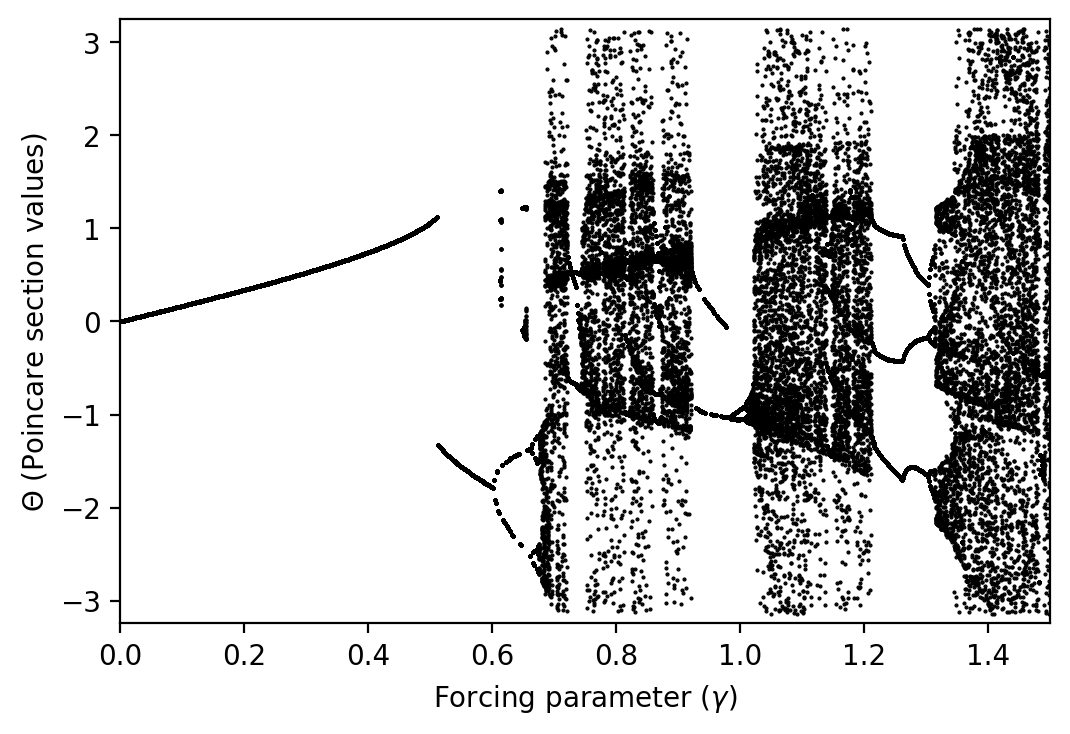

In [9]:
for i in F_0:
    Theta, _ =solve(i,return_plot=False) #gives the theta value for a given F_0
    Theta_new=Theta[-500:] #cuts the array only taking last 500 values, assumed to be steady state
    for j in range(len(Theta_new)):
        if j%10==0: #j is a time index ranging from 0.1,0.2... divisibility by 10 gives 1 second 2 second values
            plt.plot(i,Theta_new[j], 'ko',ms=0.5) #plotting bifurcation value for the steady state
            plt.ylim(-np.pi-0.1,np.pi+0.1)
            plt.xlim(0,1.5)
            plt.xlabel('Forcing parameter ($\gamma$)')
            plt.ylabel('$\Theta$ (Poincare section values)')
#divisibility by 10 occurs because the time period is 2pi/driving=1. Hence, 1 time unit= 1 tau

# Poincare Maps

In [2]:
def solve(gamma=1.5,theta_0=0,color='darkgoldenrod',label=None,return_plot=False): #solve redefined for a new value
    
    w_0=3*np.pi 
    beta=w_0/8
    omega_d=2*np.pi
    

    def f(r, t):
        theta = r[0]
        omega = r[1]
        dxdt = omega
        dvdt = - w_0**2*np.sin(theta)-2*beta*dxdt+gamma*w_0**2*np.cos(omega_d*t)

        return np.array([dxdt, dvdt], dtype=float)


    a = 0.0
    b = 100000.0 #keep in sufficient range. This will give more points on the diagram
    h = 0.1

    time = np.arange(a, b, h)
    theta = []
    omega = []

    omega_0 = 0.0
    r = np.array([theta_0, omega_0], dtype=float)
    for t in time:
        theta.append(r[0])
        omega.append(r[1])
        k1 = h * f(r, t)
        k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
        k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
        k4 = h * f(r + k3, t + h)
        r  += (k1 + 2 * k2 + 2 * k3 + k4) / 6

    if (return_plot):
        plt.scatter(theta[0],omega[0],color=color,alpha=0.5)
        if (label==None):
            label=r'$\gamma=$'+str(gamma)
        plt.plot(theta, omega, color=color, lw=0.8,label=label)
        
    return (np.array(theta),np.array(omega))

In [3]:
x_poincare=[] #empty list to store poincare section values for angle
y_poincare=[] #empty list to store poincare section values for angular velocity
theta,omega=solve(1.5) #solving for gamma=1.5 which is known for its chaotic behaviour
for j in range(len(theta)):
    if j%10==0: #again dividing by 10 to obtain values of angle and velocity at tau interval. 
        #we are dividing by 10 because h=0.1. Divide by 100 if h=0.01. w_d must be 2pi for this to work
        x_poincare.append(theta[j])
        y_poincare.append(omega[j])

In [6]:
# The problem with the above poincare angle value is that its domain is from -inf to inf
#this domain for angles needs to be changed to -pi to pi, this conversion can be done by transform function.
XX=[] #blank list for storing transformed values
for i in range(len(x_poincare)):
    XX.append(transform_to_pipi(x_poincare[i])) #transformed values 

Text(0.5, 1.0, '$\\gamma=1.5$')

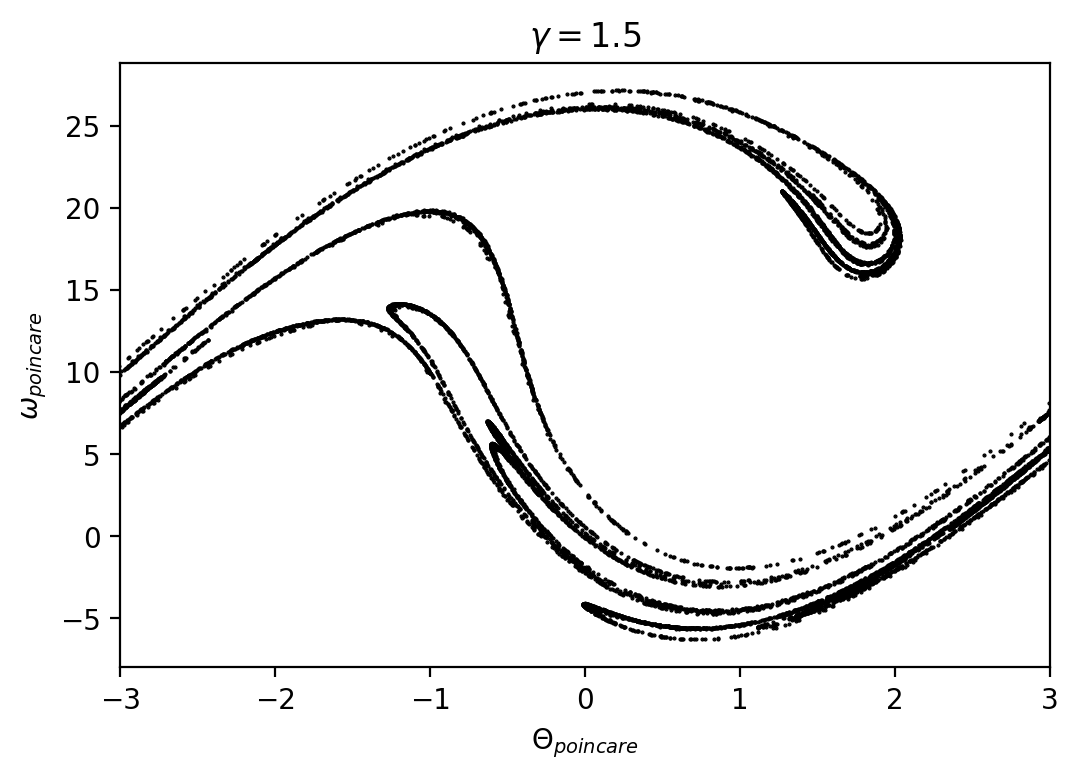

In [7]:
plt.plot(XX,y_poincare,'ko',ms=0.5) #gives poincare section for gamma=1.5. Shows fractal patterns. 
#change the value of gamma above to get graphs for the non chaotic value of gamma. 
plt.xlim(-3,3)
plt.xlabel('$\Theta_{{poincare}}$')
plt.ylabel('$\omega_{{poincare}}$')
plt.title('$\gamma=1.5$')

Text(0, 0.5, '$\\omega_{{poincare}}$')

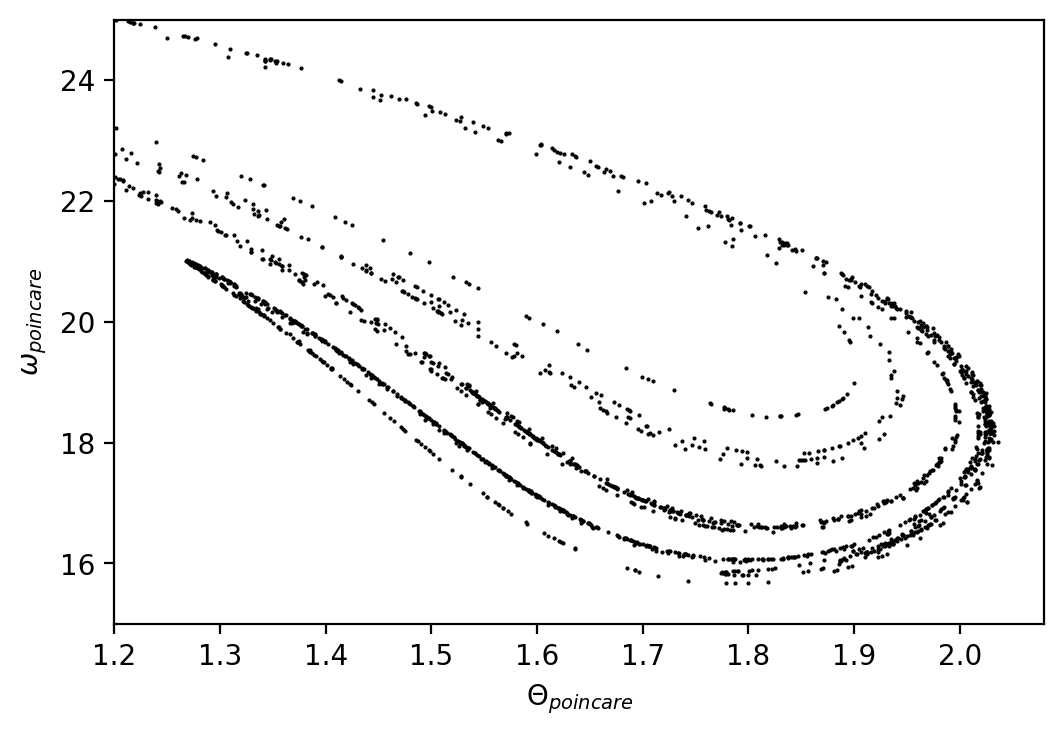

In [8]:
#Zooming in on the tongues to further discuss fractal patterns by 
plt.plot(XX,y_poincare,'ko',ms=0.5)
plt.xlim(1.2,2.08)
plt.ylim(15,25)
plt.xlabel('$\Theta_{{poincare}}$')
plt.ylabel('$\omega_{{poincare}}$')